# Genetischer Algorithmus für Rucksackproblem
In diesem Notebook möchten wir Euch den genetischen Algorithmus, den wir zur Optimierung der Moleküle verwendet haben, anhand eines einfachen Beispiels vorstellen. Wir wollen das sogenannte Rucksackproblem (auch "Knapsack Problem" genannt) lösen. Dabei geht es darum, eine Menge von Blöcken in eine Tasche zu packen. Jeder Block hat eine bestimmte Breite. Die Tasche hat eine maximale Breite, sodass nicht alle Blöcke mitgenommen werden können. Der Platz im Rucksack soll aber bestmöglich ausgenutzt werden. Das könnt Ihr Euch so vorstellen:

<img src="img/overview.png">

Links seht ihr die Auswahl von Blöcken mit verschiedenen Breiten. Rechts seht ihr die Tasche, in die eine Kombination aus Blöcken gepackt werden soll. Die Breite der Tasche wird durch die rot gestrichelten Linien markiert. Außerdem seht ihr eine Kombination aus Blöcken, die in die Tasche gepackt wurden.

Das Rucksackproblem schaut auf den ersten Blick einfach aus, ist aber ein sogenanntes "NP-vollständiges" Problem, das nicht effizient gelöst werden kann. Genau dafür eignet sich ein genetischer Algorithmus! Dieser Algorithmus ist von der Evolution wie in der Natur inspiriert und kann in vielen Fällen eine gute Lösung für Optimierungsprobleme liefern. Die Grundidee ist, dass eine gewisse Anzahl von verschiedenen Block-Kombinationen erzeugt wird. Jede dieser Kombination ist ein Individuum. Eine bestimmte Anzahl von Individuen bilden eine Population. Die besten Individuen werden ausgewählt und miteinander gekreuzt bzw. mutiert, um eine neue Generation zu erzeugen. Dieser Prozess wird so lange wiederholt, bis eine gute Lösung gefunden wurde.

 Wir haben Euch den Code für den genetischen Algorithmus bereits vorbereitet. Ihr könnt Euch den Code Schritt für Schritt ansehen und ausführen. Viel Spaß!

## Evolutionsschleife
Der genetische Algorithmus besteht aus einer sogenannten "Evolutionsschleife". Diese Schleife simuliert eine Evolution - wie in der Natur. In der folgenden Grafik sind alle Schritte erklärt:

![Evolution](./img/loop.png)

In den nächsten Absätzen könnt ihr jeden Schritt interaktiv ausprobieren!





## 1. Erzeuge Population / Fitness Berechnung
Zunächst erzeugen wir eine Anzahl von Blöcken mit unterschiedlicher Breite. Eine Kombination dieser Blöcke soll die in die Tasche gepackt werden.
* Könnt ihr ablesen wie viele Blöcke zufällig erzeugt werden?
* Fortgeschritten: Wie könnt ihr die Breite der Blöcke verändern?


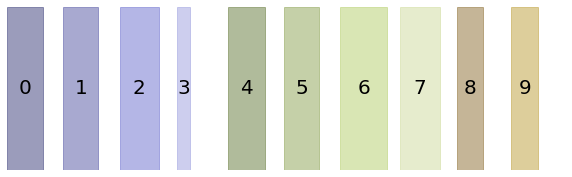

In [4]:
%matplotlib inline
import random
from helper_files import plot_blocks, correct_blocks
import numpy as np

#create number of blocks with random length
n_blocks = 10
height = 0.5
max_width = 100


blocks = [random.triangular(3, 10, 20) for i in range(n_blocks)]
blocks = correct_blocks(blocks, max_width)



plot_blocks(blocks)


Jetzt erzeugen wir die Start-Population. Dafür müssen wir uns eine Schreibweise für die Block-Kombinationen - also die genetische Information der Individuen - überlegen. In unserem Fall schreiben wir die genetische Information der Individuen als Liste von 0en und 1en. Jede 0 oder 1 steht für einen Block, der entweder in die Tasche gepackt wird oder eben nicht. Eine zufällige Population wird Euch in der Tabelle angezeigt. Zur besser Veranschaulichung könnt ihr darunter die Population auch grafisch sehen - zusammen mit der maximalen Breite der Tasche (gestrichelte Linien). In der Grafik wird auch die prozentuale Auslastung der Tasche gezeigt - das ist später die Fitness ($f$), die maximiert werden soll.
* Seht ihr den Zusammenhang zwischen Tabelle und Grafik?
* Führt die Zelle mehrmals aus, um verschiedene Populationen zu erzeugen
* Was passiert, wenn die Blöcke breiter sind als die Tasche? Was ist dann der Fitness Wert?
* Fortgeschritten: Wie funktioniert die Fitness Funktion?

,Block 0,Block 1,Block 2,Block 3,Block 4,Block 5,Block 6,Block 7,Block 8,Block 9
Individuum 0,1,1,0,1,1,0,0,1,1,0
Individuum 1,0,1,1,1,1,0,0,0,0,1
Individuum 2,0,1,1,1,0,1,0,1,1,0
Individuum 3,1,1,0,0,0,0,0,0,1,0
Individuum 4,0,0,0,1,1,1,1,0,1,0
Individuum 5,1,1,0,1,0,1,1,0,0,1
Individuum 6,0,0,1,0,1,1,0,1,1,0
Individuum 7,0,0,0,0,1,0,1,0,1,1


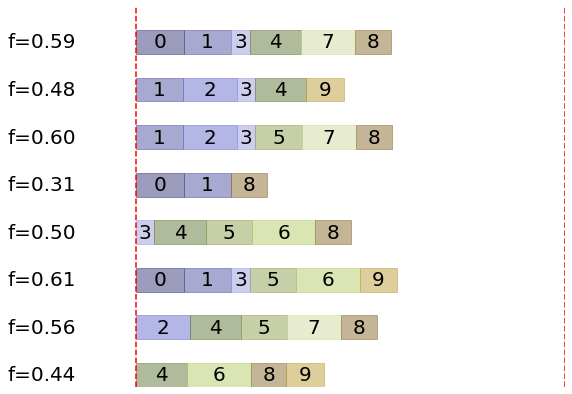

In [5]:
from helper_files import plot_population, print_population, create_nice_example
import numpy as np


def calc_fitness(individuum):
    length = 0
    for i, chosen in enumerate(individuum):
        if chosen == 1:
            length += blocks[i]
    if length > max_width:
        return 0
    else:
        return length/max_width

def erzeuge_population(n_individuen):
    population = []
    for i in range(n_individuen):
        individuum = [random.randint(0, 1) for j in range(len(blocks))]
        population.append(individuum)
    return population

population = erzeuge_population(n_individuen=8)
fitness = [calc_fitness(individuum) for individuum in population]
create_nice_example(population, fitness, max_width, blocks)
fitness_values = []

print_population(population, blocks)

#plotte population
plot_population(population, blocks, max_width, fitness, with_fitness=True)

## 2. Selektion.
Basierend auf dem Fitness-Wert $f$, werden die besten Individuen ausgewählt. In unserem Fall sind das die Individuen (Block-Kombinationen), die die Tasche am besten auslasten. In der Tabelle und dazugehörigen Grafik könnt ihr sehen, welche Individuen ausgewählt wurden. Die Fitness Werte sind in der Tabelle angegeben.

,Block 0,Block 1,Block 2,Block 3,Block 4,Block 5,Block 6,Block 7,Block 8,Block 9
Elternteil 0,0,1,1,0,1,0,1,1,0,1
Elternteil 1,0,0,1,0,0,1,1,0,1,1


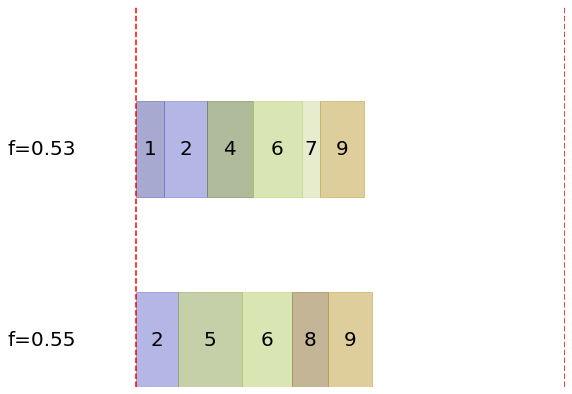

In [9]:
def select_parents(population, fitness):
    #sort by fitness
    population = [x for _, x in sorted(zip(fitness, population), key=lambda pair: pair[0], reverse=True)]
    #choose best 2 parents
    parents = population[:2]

    return parents

fitness = [calc_fitness(individuum) for individuum in population]
parents = select_parents(population, fitness)
print_population(parents, blocks, col_prefix="Elternteil")
plot_population(parents, blocks, max_width, [calc_fitness(parent) for parent in parents], with_fitness=True, sort=False)

## 3. Kreuzung
Die genetischen Informationen der ausgewählten Individuen werden jetzt gekreuzt.
* Führt die Zelle mehrfach aus, um verschiedene Kreuzungsvarianten zu sehen
* Könnt ihr sehen, wie die Kreuzung funktioniert?
* Ist die Fitness der Kinder besser als die der Eltern?

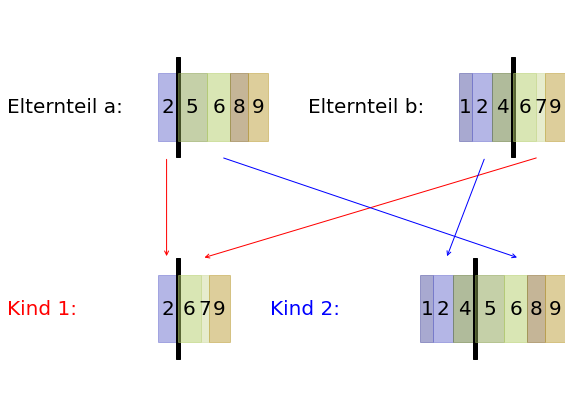

In [10]:
from helper_files import plot_cross_over

def crossover(parents):
    parent1 = parents[0].copy()
    parent2 = parents[1].copy()

    #choose random crossover point
    crossover_point = random.randint(1, len(parent1)-2)

    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]

    return (child1, child2) , crossover_point


children, cross_point = crossover(parents)
plot_cross_over(parents, children, cross_point, blocks, max_width)

## 4. Mutation
Die Kinder werden jetzt mutiert. Das bedeutet, dass zufällig ein Block ausgewählt wird und die Entscheidung, ob er in die Tasche gepackt wird oder nicht, umgekehrt wird.
* An welcher Stelle wurde mutiert?
* Verbessert die Mutation die Fitness der Kinder?
* Führt die Zelle mehrfach aus, um verschiedene Mutationen zu sehen

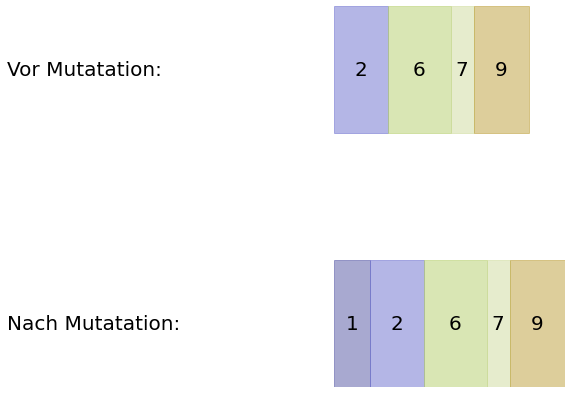

,Block 0,Block 1,Block 2,Block 3,Block 4,Block 5,Block 6,Block 7,Block 8,Block 9
Vor Mutation,0,0,1,0,0,0,1,1,0,1
Nach Mutation,0,1,1,0,0,0,1,1,0,1


In [11]:
from helper_files import plot_mutation, print_population

def mutate(individuum, plot=False):

    to_mutate = individuum.copy()

    pos = random.randint(0, len(individuum)-1)
    to_mutate[pos] = 1 - to_mutate[pos]


    if plot:
        plot_mutation(individuum, to_mutate, blocks, height)

    return to_mutate


mutated = mutate(children[0], plot = True)
print_population([mutated, children[0]], blocks, row_names=["Vor Mutation", "Nach Mutation"])

## 5. Schleife
Nun setzen wir die einzelnen Schritte zu einer Schleife zusammen. In jeder Generation wird die Fitness aller Individuen bewertet. Die besten Individuen werden ausgewählt, können sich kreuzen und die Kinder werden mutiert. Jedes Mal, wenn Ihr die Zelle ausführt, wird eine Generation simuliert. Unten seht Ihr jeweils die aktuelle Population und eine Grafik der Fitness Werte.
* Wie entwickelt sich die Fitness der Population?
* Könnt ihr den Programm-Code verstehen? Wie setzt sich die Population zusammen?
* Was passiert mit den ausgewählten Eltern?
* Fortgeschritten: Wenn ihr in der unteren Zelle die Variable `plot` auf `True` setzt, könnt ihr sehen, wie die Kreuzung und Mutation funktioniert.

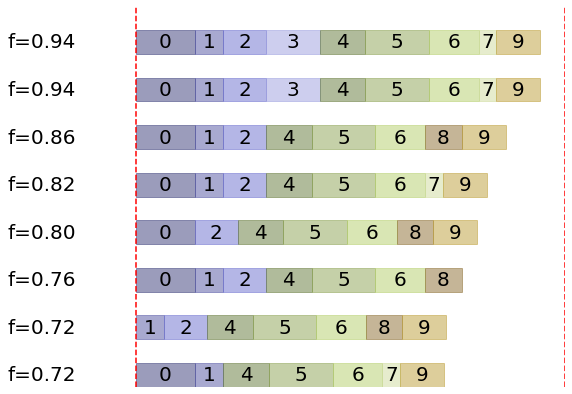

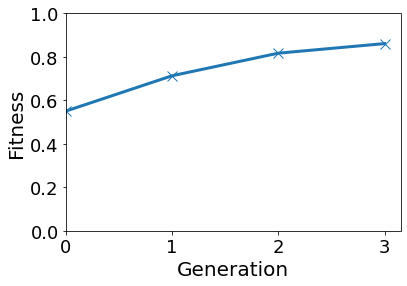

In [15]:
from helper_files import plot_fitness

plot = False

def next_generation(population, fitness):

    fitness_values.append(np.max(fitness))
    parents = select_parents(population, fitness)

    next_generation = [parents[0], parents[1]]
    for i in range(0, int((len(population)-len(parents))/2)):
        children, cross_point = crossover(parents)
        if(plot):
            plot_cross_over(parents, children, cross_point, blocks, max_width)
        mutated_children = [mutate(child, plot = plot) for child in children]
        next_generation += mutated_children
    fitness = [calc_fitness(individuum) for individuum in next_generation]
    return next_generation, fitness

fitness = [calc_fitness(individuum) for individuum in population]
population, fitness = next_generation(population, fitness)

#print_population(population)
plot_population(population, blocks, max_width, fitness, with_fitness=True, sort=True)

#create new figure
plot_fitness(fitness_values)
